Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
titanic_df = pd.read_csv('train.csv')

In [5]:
print(titanic_df.info())
print("\nFirst few lines of dataframe:")
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First few lines of dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0    

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

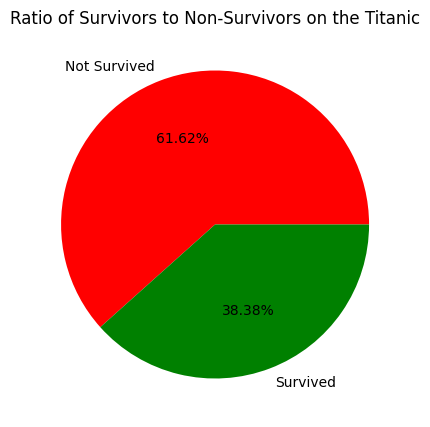

In [18]:
survived_people = titanic_df['Survived'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(survived_people, labels=['Not Survived', 'Survived'], autopct='%.2f%%', colors=['red', 'green'])
plt.title('Ratio of Survivors to Non-Survivors on the Titanic')
plt.show()

на графіку показано, що загинуло практично 2/3 від усіх людей, що були на борту, тоді як вижило лише близько третини.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


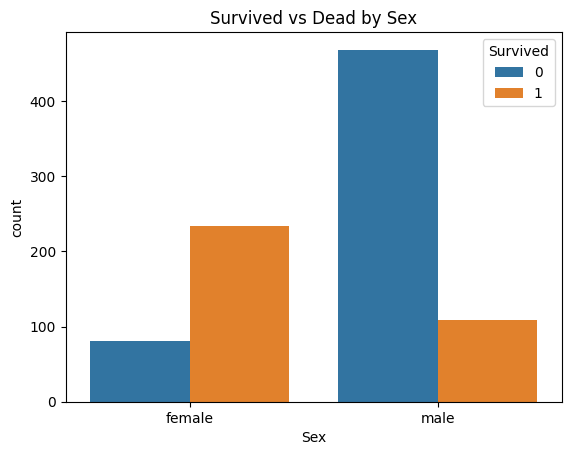

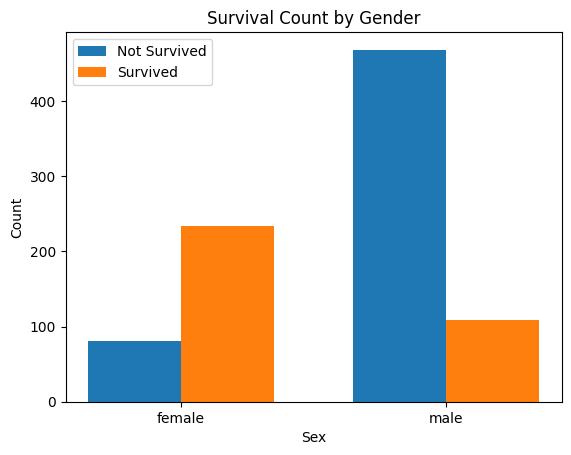

In [61]:
survival_by_sex = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

bar_width = 0.35
index = np.arange(len(survival_by_sex.index))

plt.bar(index - bar_width/2, survival_by_sex[0], bar_width, label='Not Survived')
plt.bar(index + bar_width/2, survival_by_sex[1], bar_width, label='Survived')

plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(index, survival_by_sex.index)
plt.legend()
plt.show()

Графік показує кількості уцілілих та загиблих для кожної статі. Також тут можна порівняти кількість чоловіків і жінок, що були на дорту титаніка. Візуально видно, що чоловіків загинуло у декілька разів більше ні вижило, для жінок навпаки.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

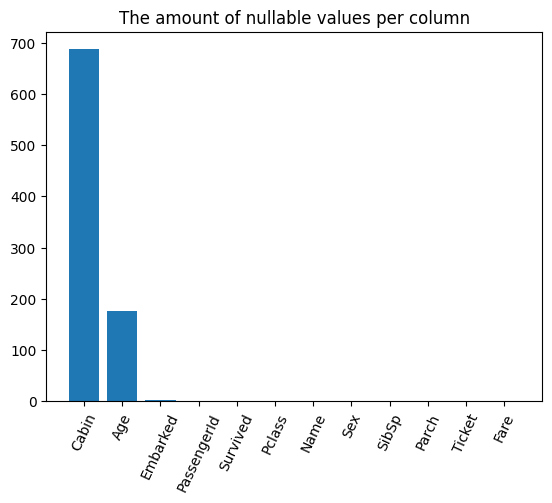

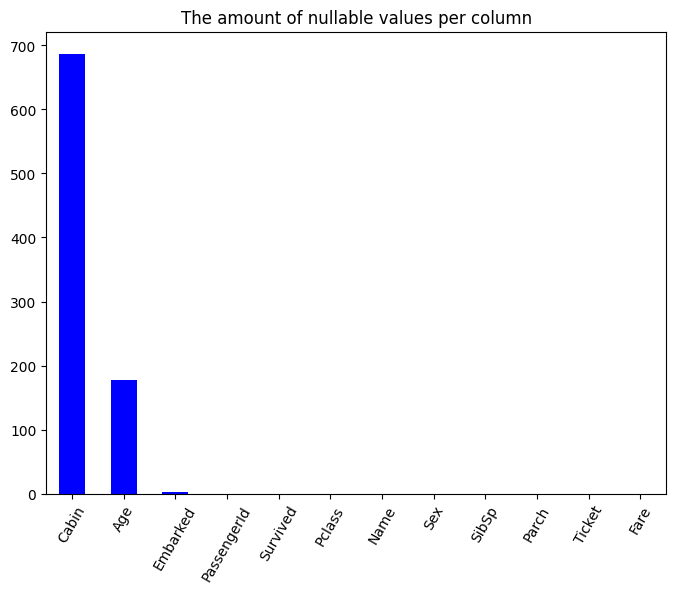

In [54]:
missing_values_count = titanic_df.isnull().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
missing_values_count_sorted.plot(kind='bar', color='blue')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=60)
plt.show()

Графік показує кількість незаповнених данних у відповідності до стовпця. бачимо, що з 891 запису для близько 700 не зазначена каюта. Також відсутній вік для приблизно 180 людей, ймовірно загиблі/зниклі. Також для декількох людей відсутнє місце відправки, що може свідчити про безбілетників чи просто втрачені данні.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

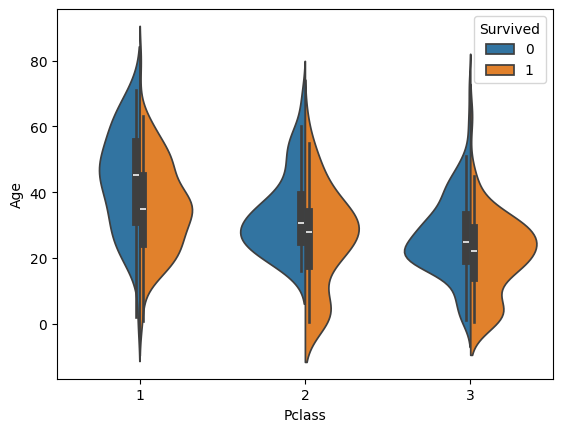

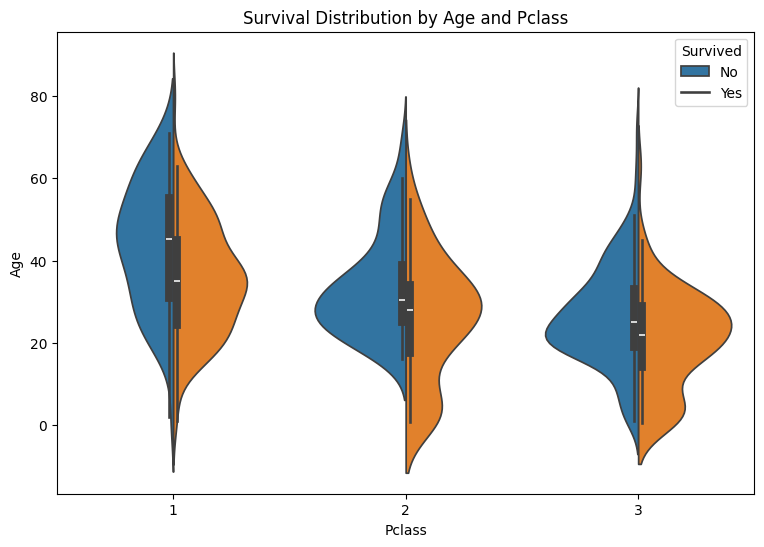

In [44]:
filtered_data = titanic_df.dropna(subset=['Age', 'Pclass'])

plt.figure(figsize=(9, 6))
sns.violinplot(data=filtered_data, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Survival Distribution by Age and Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Даний графік показує залежність кількості уцілілих до загиблих у відповідності до віку по кожному умовному соц статусу що був на титаніку.

Також горизонтальна біла риска вказує на медіану вибірки, a товста чорна вказує на IQR - показує поширення середньої половини вибірки.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


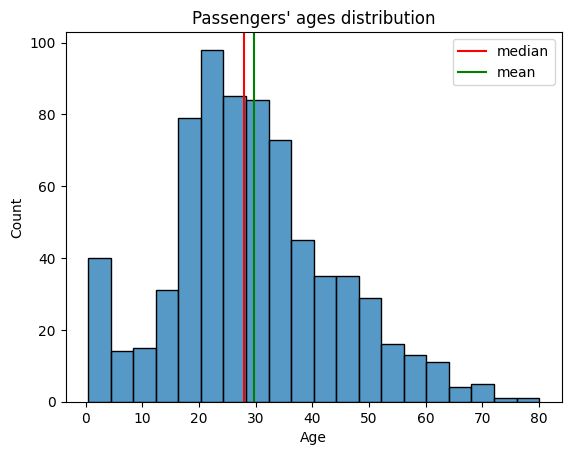

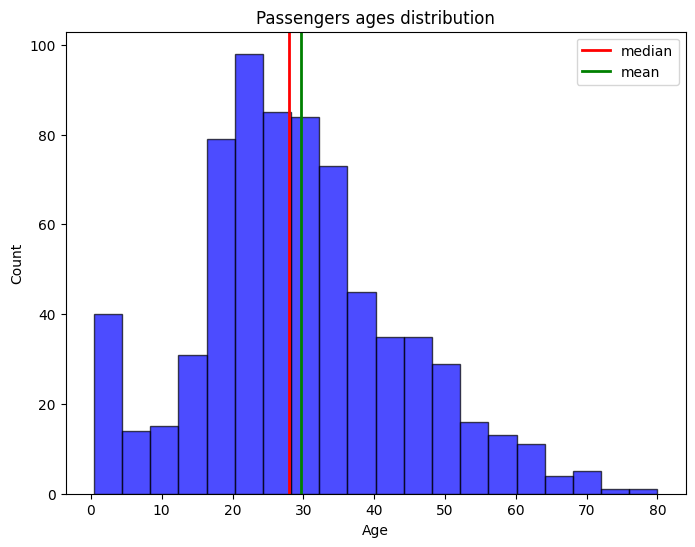

In [50]:
age_data = titanic_df['Age'].dropna()

median_age = age_data.median()
mean_age = age_data.mean()

plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(median_age, color='red', linewidth=2, label='median')
plt.axvline(mean_age, color='green', linewidth=2, label='mean')
plt.title('Passengers ages distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Графік показує залежність кількості пасажирів від віку. Бачимо, що "найпопулярніші" пасажири були від 17 до 37. Медіана вибірки 28, а от середній вік пасажирів близько 30.


7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Побудувати графік залежності ціни за квиток до кількості людей, що вижили та загинули.

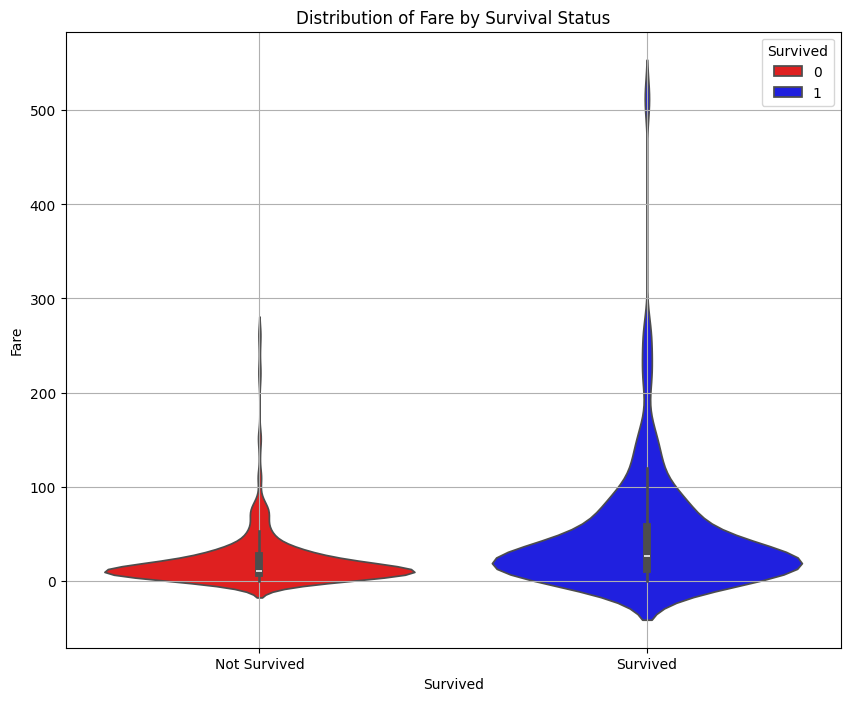

In [15]:
filtered_data = titanic_df.dropna(subset=['Fare'])

plt.figure(figsize=(10, 8))
sns.violinplot(data=filtered_data, x='Survived', y='Fare',hue='Survived', palette=['red', 'blue'])
plt.title('Distribution of Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([1, 0], ['Survived', 'Not Survived'])
plt.grid(True)
plt.show()

З графіку чітко видно, що на діапазоні цін від 0 до 35 відношення вижив до загинув приблизно 1 до 1, але для білетів за ціною вище 40 доларів бачимо багатократне переважання уціліліх до загиблих.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

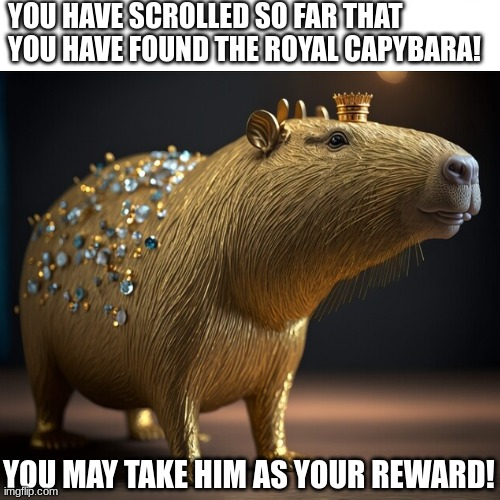